# Lab 6 - Image, Datasets, Dataloaders, Augmentation

## Part I - Images

Images in Python are usually represented as ndarrays. PyTorch, of course, supports also the image as a Tensor.

Depending upon the library, images may be encoded differently:
* PIL uses, by default, the RGB encoding. The image can be represented as a $h\times w\times 3$ ndarray by calling the `.asarray()` method of numpy
* opencv uses, by default, the BGR encoding (reverse than RGB). The image, in Python, is directly stored as a $h\times w\times 3$ ndarray.
* PyTorch prefers images to be stored as $3\times h\times w$ tensors.

### Reading an image

* With PIL, images can be read with the `PIL.Image.open(path)` method
* torchvision, a subpackage of PyTorch for Computer Vision, has a method `io.read_image(path)` for reading images as JPEG or PNG. For other formats, we must resort to PIL.

<class 'PIL.JpegImagePlugin.JpegImageFile'>


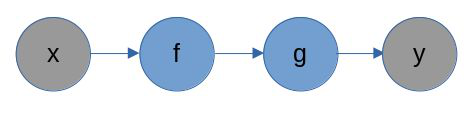

In [1]:
import torchvision
import torch
from PIL import Image
import numpy as np
import os

img = Image.open("imgs/02/compgra1.jpg")
print(type(img)) # the image is a type on its own
img # I can visualize the image directly like this. No need for matplotlib or other auxiliary libs

to print the raw content of an image, we must call `np.asarray` on it.

In [2]:
img_array = np.asarray(img)
print(img_array.shape)
img_array

(115, 472, 3)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [3]:
img_torch = torchvision.io.read_image("imgs/03/dataloader01.jpg")
print(type(img_torch), img_torch.shape, "\n", img_torch)
# this time the image IS a tensor
# take a look at the shape

<class 'torch.Tensor'> torch.Size([3, 319, 600]) 
 tensor([[[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]]], dtype=torch.uint8)


#### Visualizing the image from a Tensor

In order to visualize the image, we can convert it to a PIL Image. But how?

In [17]:
#from torchvision import transforms
#transforms.ToPILImage()(t).convert("RGB")

In [27]:
def tensor2PIL(tensor:torch.Tensor):
    # your code here
    return transforms.ToPILImage()(tensor).convert("RGB")

## Datasets

For this lab, we will use a custom dataset for classifying cats and dogs. It is a subset of the famous dataset from the [cats vs. dogs Kaggle challenge](https://www.kaggle.com/competitions/dogs-vs-cats/). You can find it in `data/catsdogs`.

In [19]:
catsdogs_viz = [Image.open(os.path.join("data/catsdogs", im)) for im in os.listdir("data/catsdogs") if im.endswith(".jpg")]
print("Tot images", len(catsdogs_viz))

Tot images 10


Let's have a look at the data

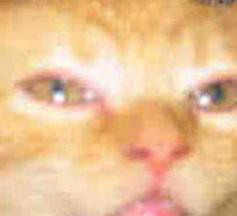

In [20]:
catsdogs_viz[1]

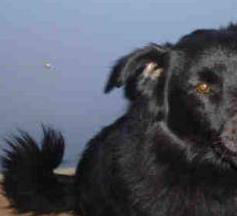

In [21]:
catsdogs_viz[2]

### Building a custom dataset

Let us use our knowledge to build a custom dataset out of these images

In [22]:
class CatsVsDogsDataset(torch.utils.data.Dataset):
    def __init__(self, root):
        self.data = [torchvision.io.read_image(os.path.join(root, im)) for im in sorted(os.listdir(root)) if im.endswith(".jpg")]
        self.labels = self._get_labels(os.path.join(root, "labels.txt"))
    
    def _get_labels(self, txt_path):
        with open(txt_path, "r") as f:
            labels = [int(line.strip()) for line in f]
        return labels
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        return self.data[index], self.labels[index]

now, the lazy version...

In [23]:
class CatsVsDogsDatasetLazy(torch.utils.data.Dataset):
    def __init__(self, root):
        self.data = [os.path.join(root, im) for im in sorted(os.listdir(root)) if im.endswith(".jpg")]
        self.labels = self._get_labels(os.path.join(root, "labels.txt"))
    
    def _get_labels(self, txt_path):
        with open(txt_path, "r") as f:
            labels = [int(line.strip()) for line in f]
        return labels
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        return torchvision.io.read_image(self.data[index]), self.labels[index]

let us try the new dataset:

In [24]:
dataset = CatsVsDogsDataset("data/catsdogs")

print(dataset.data)
print(dataset.labels)
print(len(dataset))
first_data = dataset[0]
print(type(first_data))

[tensor([[[161, 184, 196,  ...,  59,  32,  21],
         [139, 158, 177,  ...,  44,  31,  34],
         [125, 114, 119,  ...,  28,  32,  46],
         ...,
         [154,  90,  64,  ...,  68, 137, 147],
         [115, 167, 104,  ...,  89, 162, 197],
         [108, 167, 134,  ..., 115, 127, 139]],

        [[199, 222, 234,  ..., 105,  78,  67],
         [177, 196, 215,  ...,  90,  77,  80],
         [166, 155, 160,  ...,  73,  77,  91],
         ...,
         [177, 115,  91,  ..., 111, 180, 192],
         [138, 192, 131,  ..., 132, 205, 242],
         [131, 192, 161,  ..., 156, 170, 182]],

        [[160, 183, 195,  ...,  68,  41,  30],
         [138, 157, 176,  ...,  51,  38,  41],
         [126, 115, 120,  ...,  34,  38,  52],
         ...,
         [135,  75,  50,  ...,  57, 126, 137],
         [ 96, 152,  90,  ...,  76, 149, 185],
         [ 89, 152, 120,  ..., 100, 114, 126]]], dtype=torch.uint8), tensor([[[172, 173, 174,  ..., 126, 134, 142],
         [173, 173, 175,  ..., 133, 13

## Part II - DataLoaders

DataLoaders can be quickly constructed from a Dataset...

In [25]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True)

let us loop through the dataloader:

In [28]:
list_of_images = []
for imgs, labels in dataloader:
    print(imgs.shape, labels)
    for img in imgs:
        list_of_images.append(tensor2PIL(img))

torch.Size([2, 3, 216, 237]) tensor([1, 1])
torch.Size([2, 3, 216, 237]) tensor([1, 1])
torch.Size([2, 3, 216, 237]) tensor([0, 0])
torch.Size([2, 3, 216, 237]) tensor([0, 1])
torch.Size([2, 3, 216, 237]) tensor([0, 0])


**Q**: Do you notice something different w.r.t. what we saw before?

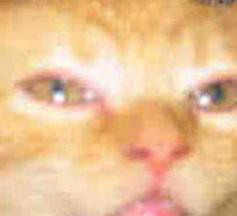

In [29]:
list_of_images[0]

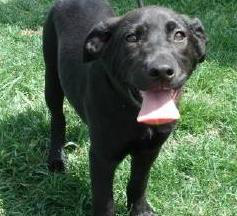

In [30]:
list_of_images[4]

## Part III - Data Augmentation

From the lecture, we know that we can construct custom augmentation pipelines using torchvision.

Let us quickly implement augmentability in our (non-lazy) dataset

In [31]:
class CatsVsDogsDatasetAugmentable(CatsVsDogsDataset):
    def __init__(self, root, transform=None):
        super().__init__(root)
        self.transform = transform
    
    def __getitem__(self, index):
        img, label = super().__getitem__(index)
        if self.transform:
            img = self.transform(img)
        return img, label

**Q**: What about the `__len__` method?

In [32]:
transform_pipeline = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(degrees=15),
])

aug_dataset = CatsVsDogsDatasetAugmentable("data/catsdogs", transform=transform_pipeline)

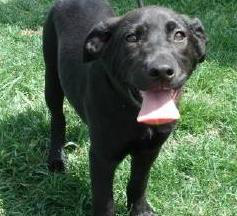

In [33]:
tensor2PIL(aug_dataset.data[0])

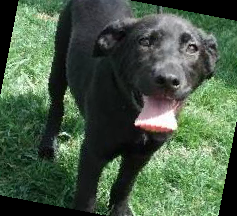

In [34]:
tensor2PIL(aug_dataset[0][0])

**Q**: What is the difference between the two code snippets here above?

#### Problem to solve:

* Suppose we have a dataset composed of $n$ images
* As opposed to the cats vs dogs example we saw before, the images don't have a common size $h\times w$
* **What are my possibilities for training an ANN on this dataset?**

# End of "compulsory" lab. Next we have some optional suggestions for loading datasets doing and data augmentation in PyTorch

#### The "compulsory" augmentations: how to do them on our dataset

```
pipeline = T.Compose([
	…,
	T.ToTensor(),
	T.Normalize(mean=mean, std=std)
])

```

Essentially, we need to calculate `mean` and `std`.

We have our data in  `dataset.data`. What can we do to get mean and std?

In [ ]:
# your code here

### Train/Test splitting in PyTorch

We can apply a train/test split by using the `torch.utils.data.random_split` method

In [ ]:
pct_train = .7
len_train = int(len(aug_dataset) * pct_train)
len_test = len(aug_dataset) - len_train
trainset, testset = torch.utils.data.random_split(aug_dataset, [len_train, len_test])

Notice that now, the `trainset` and `aug_dataset` are of two different types!

In [ ]:
print(type(aug_dataset), type(trainset), type(testset))

we can recover the original dataset by accessing the `dataset` attribute of `torch.utils.data.dataset.Subset`

In [ ]:
trainset.dataset.labels

Despite the difference, both `trainset` and `aug_dataset` can be equally used to create DataLoaders...


## Miscellaneous dataset helps

### ImageFolder

It often happens that datasets are distributed with the following folder structure:

```
root_folder
  |
  - class 0
    |
    - images belonging to class 0
  |
  ...
  |
  - class i
    |
    - images belonging to class i
  |
  ...
```
without a corresponding `labels.txt` file (or similar file.)


When the situation is this one, without building exotic custom classes, we can use the `torchvision.datasets.ImageFolder(...)` class that automatically builds a (lazy) dataset for us.

### Downloading widespread benchmark datasets

To download benchmark datasets like
* MNIST
* Cifar10 and Cifar100
* Fashion-MNIST
* Microsoft COCO
* ...

we can use the corresponding [`torchvision.datasets`](https://pytorch.org/vision/0.8/datasets.html) classes. Just a couple of notes:
* remember to set, preferrably, the flag `download` to True in the constructor (otherwise the dataset won't donwload)
* ImageNet won't download because of recent controversies on fairness and privacy. If you need it, download it (at your home) from [here](https://academictorrents.com/details/a306397ccf9c2ead27155983c254227c0fd938e2)

## References

* Pillow docs: https://pillow.readthedocs.io/en/stable/
* torch tutorial on datasets and dataloaders: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#datasets-dataloaders
* torchvision tutorials and docs
    * IO: https://pytorch.org/vision/0.8/io.html
    * Datasets: https://pytorch.org/vision/stable/datasets.html
    * Transformations: https://pytorch.org/vision/stable/transforms.html
    
#### Additional material

* Albumentations, library for more advanced data augmentation: https://albumentations.ai/
